$$\large{\color{blue}{Regression : }}$$

$Realized \space By : Narjes \space Haouala-Mootez \space Dakhlaoui-Saifeddine\space Barkia-Taher\space Romdhane$

# I. Importing modules

In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Regressors
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

#metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# II. Exporatory Analysis  / ***Visualisation***

In [3]:
df=pd.read_csv("forestfires.csv")
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df.dropna(inplace=True)
month=df['month']
area=df['area']
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


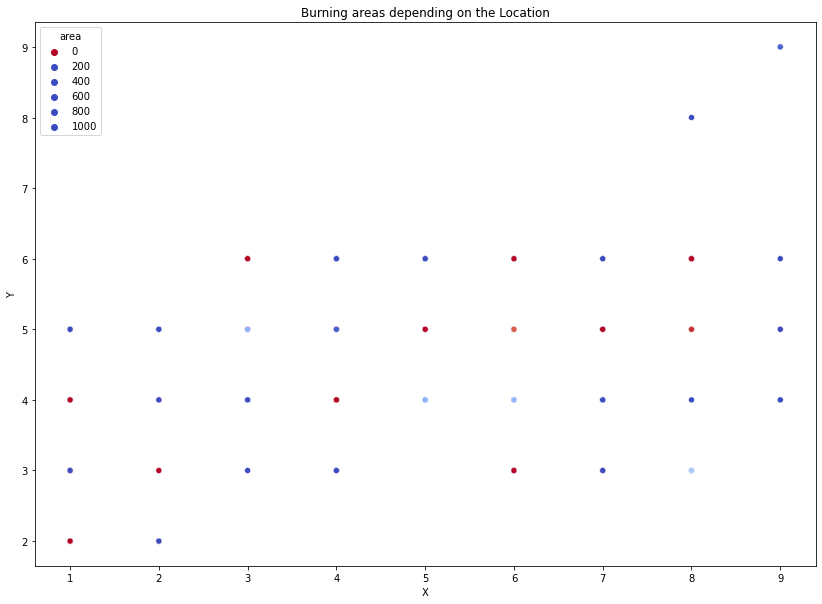

In [4]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df, x = "X", y = "Y", hue = "area",sizes =200 ,hue_norm = (0.1,2.9),palette = "coolwarm_r")
plt.title("Burning areas depending on the Location")
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**This map tells that the area that get burned mostly will have more precise location than the other areas wi=hich mean that the X and Y features are not negligable** 

Text(0, 0.5, 'area')

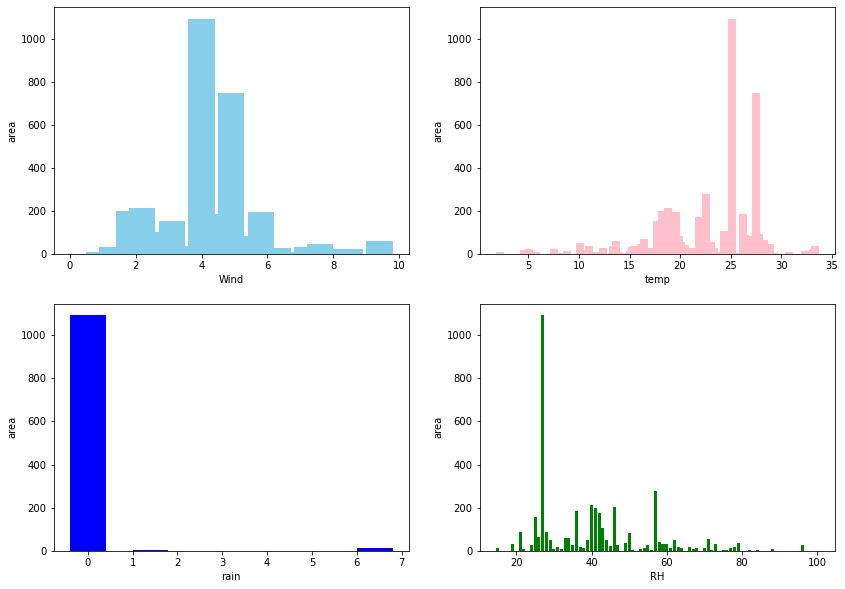

In [5]:
plt.figure(figsize = (14,10))
plt.subplot(221)
plt.bar(df['wind'],df['area'],color = "skyblue")
plt.xlabel('Wind')
plt.ylabel('area')
plt.subplot(222)
plt.bar(df['temp'],df['area'],color='pink')
plt.xlabel('temp')
plt.ylabel('area')
plt.subplot(223)
plt.bar(df['rain'],df['area'],color='blue')
plt.xlabel('rain')
plt.ylabel('area')
plt.subplot(224)
plt.bar(df['RH'],df['area'],color='green')
plt.xlabel('RH')
plt.ylabel('area')

$\large{\underline{\color{blue}{interpretation: }}}$

**-it's logic that when we have higher temp we will have a lower humidity and therefore the risk for a burned area will increase.**

**-lower rain values will automatically favours the fires.**


Text(0, 0.5, 'Number of Fires')

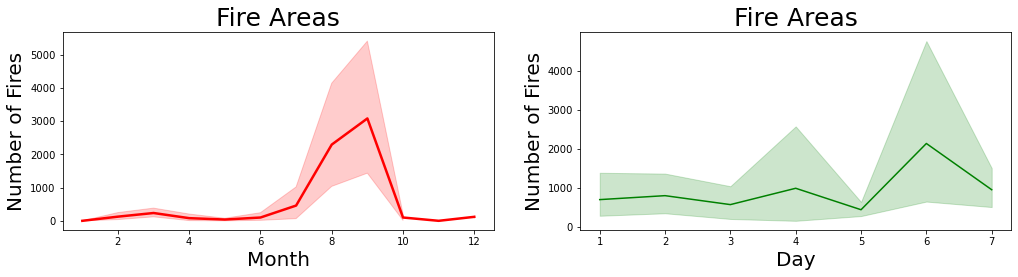

In [6]:
plt.figure(figsize=(17,8))
plt.subplot(221)
sns.lineplot(x = 'month', y = 'area', data = df, estimator = 'sum', color = 'red',lw = 2.5)
plt.title('Fire Areas', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.subplot(222)

sns.lineplot(x='day', y='area',data=df,estimator='sum',color='green',lw=1.5)
plt.title('Fire Areas', fontsize = 25)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)

$\large{\underline{\color{blue}{interpretation: }}}$

**Nothing surprising would emerge from a month-by-month analysis. There are many more fires in the second half of the year than the first, particularly in late summer and early autumn.**

**A day-by-day view will reveal that most of the fires occure mainly in the last days of the week mostly on the week-ends when people do camping/piking which will increase the risk of fire**

## $\large{\color{blue}{Plot\space the \space distribution \space of \space the \space data}}$

Text(0.5, 0, 'RH')

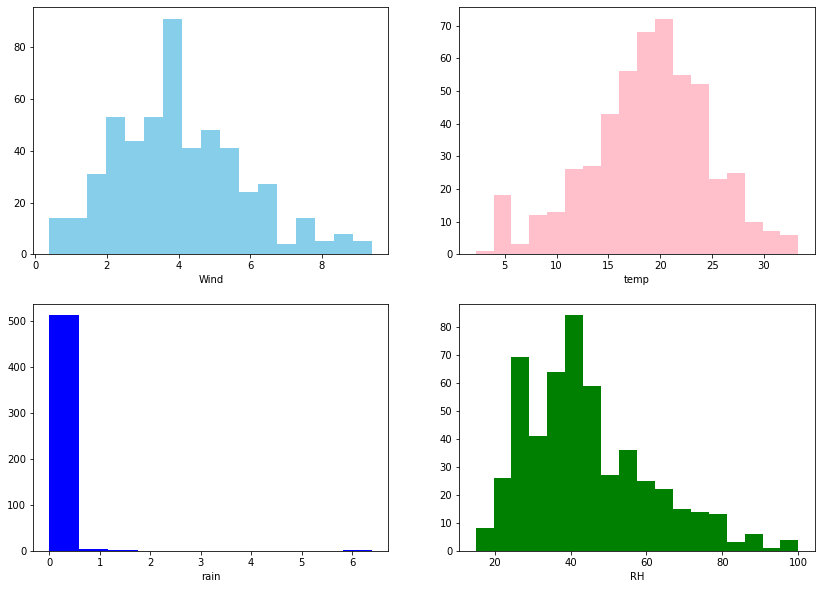

In [7]:

plt.figure(figsize = (14,10))
plt.subplot(221)
plt.hist(df['wind'],bins='auto',color = "skyblue")
plt.xlabel('Wind')
plt.subplot(222)
plt.hist(df['temp'],bins='auto',color = "pink")
plt.xlabel('temp')
plt.subplot(223)
plt.hist(df['rain'],bins='auto',color='blue')
plt.xlabel('rain')
plt.subplot(224)
plt.hist(df['RH'],bins='auto',color='green')
plt.xlabel('RH')

$\large{\underline{\color{blue}{interpretation: }}}$

**'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes**

Text(0.5, 0, 'RH')

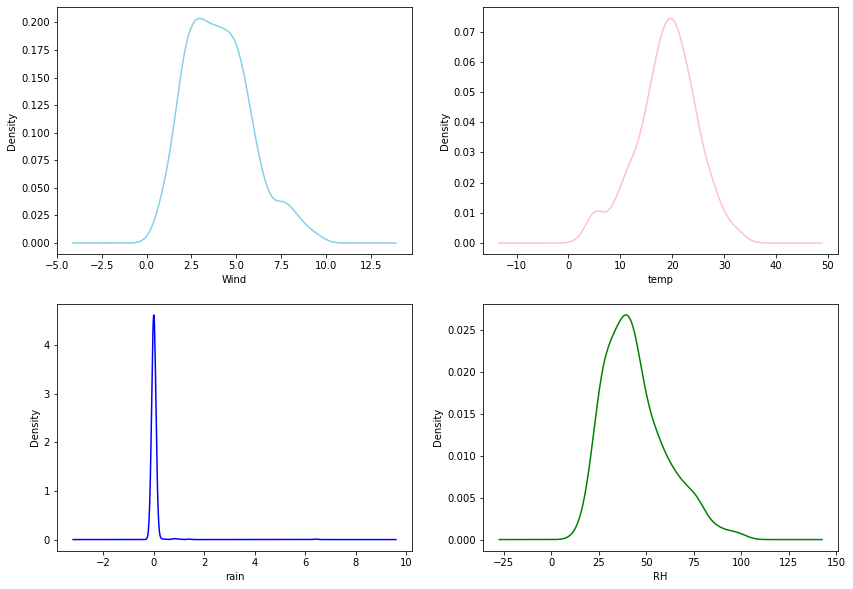

In [8]:
plt.figure(figsize = (14,10))
plt.subplot(221)
df['wind'].plot.kde(color='skyblue')
plt.xlabel('Wind')
plt.subplot(222)
df['temp'].plot.kde(color='pink')
plt.xlabel('temp')
plt.subplot(223)
df['rain'].plot.kde(color='blue')
plt.xlabel('rain')
plt.subplot(224)
df['RH'].plot.kde(color='green')
plt.xlabel('RH')

## $\large{\color{blue}{Plot\space the \space Correlation \space Map}}$

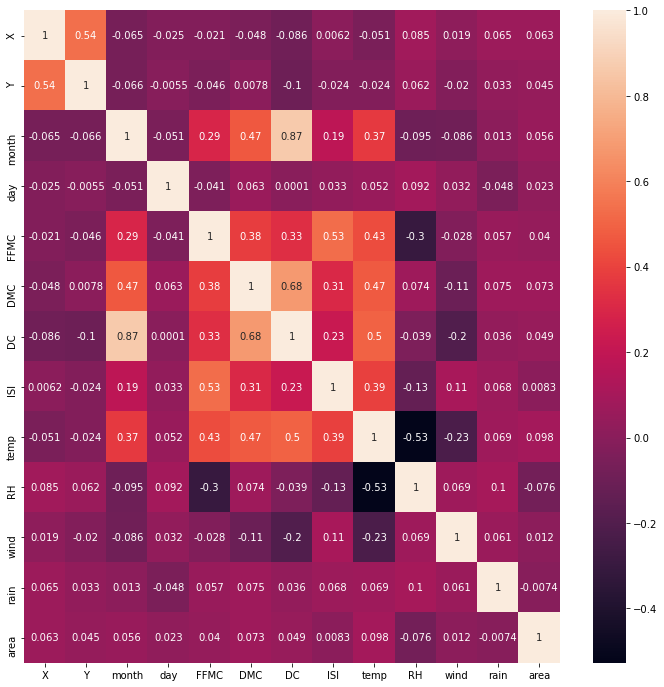

In [9]:
plt.figure(figsize=(12,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**we can see clearly that we have a strong correlation between the months and DC which represents the Drying Code (drying deep into the soil) in the summer period the soil will be dry and the opposite case for the winter.**

**A negative correlation between temp and RH is explained scientifically**. 

# II. Preprocessing

## $Normalize \space Data$

In [10]:
#extracting data from the dataframe
X=df.values[:,0:12]
Y=np.log(df.values[:,12]+1)

#split train test the data with size of 20% for the test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#Standerize and Normalize the Data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## $PCA$

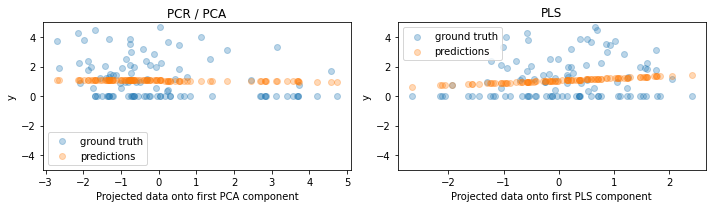

In [11]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, Y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, Y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].set_ylim([-5,5])
axes[0].scatter(pca.transform(X_test), Y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',ylabel='y', title='PCR / PCA')
axes[0].legend()

axes[1].scatter(pls.transform(X_test), Y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component', ylabel='y', title='PLS')
axes[1].set_ylim([-5,5])
axes[1].legend()
plt.tight_layout()
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**-using only one PCA component doesn't give a bad prediction but if we increase the number of components will have more precision.**

**-in order to see more the importance of the features we have we will do a Forward Selection Process and then conclude**

## $\large{Forward \space Selection:}$

In [12]:
# need to have the bibliothéque mlxtend :  pip install mlxtend  
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

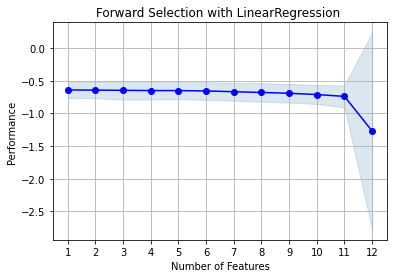

In [13]:
model = LinearRegression(fit_intercept=False)
sfs1 = sfs(model,k_features=12,forward=True,scoring='r2',cv=10)
sfs1.fit(X_train,Y_train)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward Selection with LinearRegression ')
plt.grid()
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**Using almot all features will have the same impact on the R² Coefficient evven when using features not highly correlated between them.**

**So there is no need to select some features when using Linear Regression.**

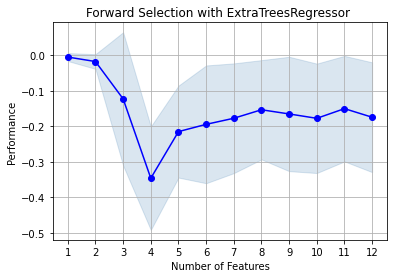

In [14]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
sfs1 = sfs(model,k_features=12,forward=True,scoring='r2',cv=10)
sfs1.fit(X_train,Y_train)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward Selection with ExtraTreesRegressor ')
plt.grid()
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**including all features in Extra Trees Regressor will make the R² coefficient stagnant.**

$\large{\underline{\color{blue}{Conclusion \space for \space feature \space selection: }}}$

**The forward selection on both LinearRegression and ExtraTreesRegressor shows that including all the features will not have a huge impact on the result of the R² index so we will not exclude any features for this study**

# III. Regression

## $\large{Linear \space Regression:}$

### $\large{linear \space regression \space \min_{w} || X w - y||_2^2}$

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred = linear_reg.predict(X_test)

print('Coefficients: \n', linear_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% -r2_score(Y_test, Y_pred))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('Root-mean-square deviation : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Coefficients: 
 [ 0.0153729   0.1046185   0.28919005 -0.00329392  0.03425725  0.10353689
 -0.25326342 -0.04585426 -0.05880001 -0.07918917  0.04783201  0.05802919]
Mean squared error: 2.43
Coefficient of determination: 0.0087
mean_absolute_error : 1.2057057353185523 
mean_squared_error : 2.4286100336156466 
Root-mean-square deviation : 1.5583998311138405 


## $\large{Ridge \space \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2}$

In [16]:
parameters = {'alpha':[0.1,1,10,100,1000]}
reg =Ridge()
clf = GridSearchCV(reg, parameters,cv=10)
clf.fit(X_train,Y_train)


print("Best Validation Score (F1 score ): {}".format(clf.best_score_))
print("Best params: {}".format(clf.best_params_))
Y_pred = clf.predict(X_test)


print('Coefficient of determination: %.4f'% -r2_score(Y_test, Y_pred))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Best Validation Score (F1 score ): -0.01275130122763396
Best params: {'alpha': 1000}
Coefficient of determination: 0.0174
mean_absolute_error : 1.2174741376172062 
mean_squared_error : 2.449421708546485 
mean_squared_error : 1.5650628449191697 


## $\large{Lasso \space \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}}$

In [17]:
parameters = {'alpha':[0.1,1,10,100,1000]}
lasso =Lasso()
clf = GridSearchCV(lasso, parameters,cv=10)
clf.fit(X_train,Y_train)


print("Best Validation Score (F1 score ): {}".format(clf.best_score_))
print("Best params: {}".format(clf.best_params_))
Y_pred = clf.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% -r2_score(Y_test, Y_pred))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Best Validation Score (F1 score ): -0.009595913198951367
Best params: {'alpha': 1}
Coefficient of determination: 0.0263
mean_absolute_error : 1.2244938312841889 
mean_squared_error : 2.4708672580581137 
mean_squared_error : 1.5718992518791126 


## ${ElasticNet \space : \underset{\beta}{\operatorname{argmin}} \left\{ \sum_{i=1}^N\left(y_i-\sum_{j=1}^p x_{ij} \beta_j\right)^2  + \lambda_1 \sum_{j=1}^p |\beta_j|+ \lambda_2 \sum_{j=1}^p \beta_j^2 \right\}}$

In [18]:
parameters = {'alpha':[0.1,1,10,100,1000]}
lasso =ElasticNet()
clf = GridSearchCV(lasso, parameters,cv=10)
clf.fit(X_train,Y_train)


print("Best Validation Score (F1 score ): {}".format(clf.best_score_))
print("Best params: {}".format(clf.best_params_))
#print("Random Forest test score :",clf.score(X_test,y_test))
Y_pred = clf.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% -r2_score(Y_test, Y_pred))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Best Validation Score (F1 score ): -0.009595913198951367
Best params: {'alpha': 1}
Coefficient of determination: 0.0263
mean_absolute_error : 1.2244938312841889 
mean_squared_error : 2.4708672580581137 
mean_squared_error : 1.5718992518791126 


## $\large{RandomForestRegressor}$

In [19]:
parameters = {'n_estimators':[10,100,1000]}
regr = RandomForestRegressor(random_state=10)
clf = GridSearchCV(regr, parameters,cv=10)
clf.fit(X_train,Y_train)


print("Best Validation Score (F1 score ): {}".format(clf.best_score_))
print("Best params: {}".format(clf.best_params_))
#print("Random Forest test score :",clf.score(X_test,y_test))
Y_pred = clf.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% -r2_score(Y_test, Y_pred))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Best Validation Score (F1 score ): -0.1367000556505226
Best params: {'n_estimators': 1000}
Coefficient of determination: 0.0387
mean_absolute_error : 1.218835434352153 
mean_squared_error : 2.5008481181525632 
mean_squared_error : 1.5814070058503482 


## $\large{BaggingRegressor \space based \space on\space SVR}$

In [20]:
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=1000, random_state=0).fit(X_train, Y_train)
Y_predict=regr.predict(X_test)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'% abs(r2_score(Y_test, Y_pred)))

print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Coefficient of determination: 0.0387
mean_absolute_error : 1.218835434352153 
mean_squared_error : 2.5008481181525632 
mean_squared_error : 1.5814070058503482 


## $\large{ExtraTreesRegressor}$

In [21]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, Y_train)
Y_predict=regr.predict(X_test)
abs(reg.score(X_test, Y_test))

from sklearn import metrics
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

mean_absolute_error : 1.218835434352153 
mean_squared_error : 2.5008481181525632 
mean_squared_error : 1.5814070058503482 


## $\large{Multi \space Layer \space Perceptron}$

In [22]:
nn_reg_model = MLPRegressor(hidden_layer_sizes=(16, 16))
nn_reg_model.fit(X_train, Y_train)
Y_predict=nn_reg_model.predict(X_test)

print('Coefficient of determination: %.4f'% abs(r2_score(Y_test, Y_predict)))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_predict)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_predict)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))))

Coefficient of determination: 0.0156
mean_absolute_error : 1.181946076615981 
mean_squared_error : 2.4452066062336177 
mean_squared_error : 1.5637156411041035 


C:\Users\Mootez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## $\large{KNeighborsRegressor}$

In [23]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, Y_train)

Y_predict = knn_reg.predict(X_test)
MSE = mean_squared_error(Y_test, Y_predict)
RMSE = np.sqrt(MSE)


print('Coefficient of determination: %.4f'% abs(r2_score(Y_test, Y_predict)))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_predict)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_predict)))
print('Root_mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))))

Coefficient of determination: 0.1670
mean_absolute_error : 1.279771698036884 
mean_squared_error : 2.809669108450928 
Root_mean_squared_error : 1.676206761843815 


##  $\large{XGBoost}$

In [24]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, alpha = 10, n_estimators = 1000)
xg_reg.fit(X_train,Y_train,eval_set=[(X_train, Y_train), (X_test, Y_test)])
Y_predict=xg_reg.predict(X_test)

[0]	validation_0-rmse:1.44195	validation_1-rmse:1.72646
[1]	validation_0-rmse:1.42553	validation_1-rmse:1.70572
[2]	validation_0-rmse:1.41041	validation_1-rmse:1.68731
[3]	validation_0-rmse:1.39733	validation_1-rmse:1.67189
[4]	validation_0-rmse:1.38785	validation_1-rmse:1.65876
[5]	validation_0-rmse:1.37701	validation_1-rmse:1.64571
[6]	validation_0-rmse:1.37046	validation_1-rmse:1.63597
[7]	validation_0-rmse:1.36490	validation_1-rmse:1.62709
[8]	validation_0-rmse:1.35991	validation_1-rmse:1.61892
[9]	validation_0-rmse:1.35050	validation_1-rmse:1.61306
[10]	validation_0-rmse:1.34706	validation_1-rmse:1.60814
[11]	validation_0-rmse:1.34237	validation_1-rmse:1.60097
[12]	validation_0-rmse:1.33756	validation_1-rmse:1.59598
[13]	validation_0-rmse:1.33312	validation_1-rmse:1.59082
[14]	validation_0-rmse:1.32721	validation_1-rmse:1.58502
[15]	validation_0-rmse:1.32149	validation_1-rmse:1.58110
[16]	validation_0-rmse:1.31059	validation_1-rmse:1.57598
[17]	validation_0-rmse:1.30691	validation

[144]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[145]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[146]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[147]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[148]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[149]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[150]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[151]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[152]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[153]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[154]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[155]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[156]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[157]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[158]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[159]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[160]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[161]	validati

[286]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[287]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[288]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[289]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[290]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[291]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[292]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[293]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[294]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[295]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[296]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[297]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[298]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[299]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[300]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[301]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[302]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[303]	validati

[428]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[429]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[430]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[431]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[432]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[433]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[434]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[435]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[436]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[437]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[438]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[439]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[440]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[441]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[442]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[443]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[444]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[445]	validati

[570]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[571]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[572]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[573]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[574]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[575]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[576]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[577]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[578]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[579]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[580]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[581]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[582]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[583]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[584]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[585]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[586]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[587]	validati

[712]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[713]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[714]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[715]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[716]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[717]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[718]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[719]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[720]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[721]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[722]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[723]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[724]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[725]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[726]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[727]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[728]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[729]	validati

[854]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[855]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[856]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[857]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[858]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[859]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[860]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[861]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[862]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[863]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[864]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[865]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[866]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[867]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[868]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[869]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[870]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[871]	validati

[996]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[997]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[998]	validation_0-rmse:1.15777	validation_1-rmse:1.54872
[999]	validation_0-rmse:1.15777	validation_1-rmse:1.54872


In [25]:
print('Coefficient of determination: %.4f'% abs(r2_score(Y_test, Y_predict)))
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(Y_test, Y_predict)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(Y_test, Y_predict)))
print('Root_mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))))

Coefficient of determination: 0.0038
mean_absolute_error : 1.2025093250084535 
mean_squared_error : 2.398529160027135 
Root_mean_squared_error : 1.548718554168941 


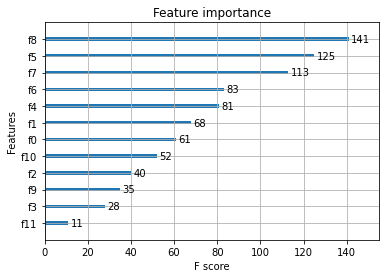

In [26]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

In [27]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

$\large{\underline{\color{blue}{interpretation: }}}$

**-The most important feature for XgBoost ist Temp then DMC and ISI and the most insignificant Feature for XGBoost is Rain**

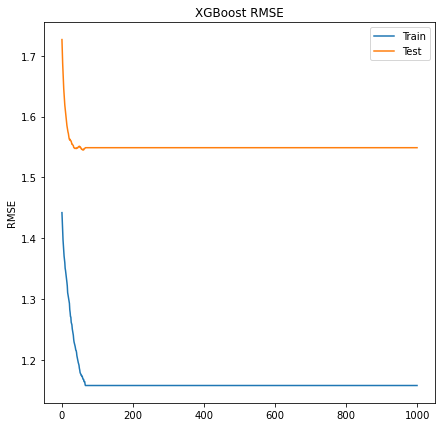

In [28]:
results = xg_reg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot RMSE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

$\large{\underline{\color{blue}{interpretation: }}}$

**we can deduce from the plot above that even when we increase the complexity of the model to 1000 estimators it will stay stagnant and will not have an impact of the RMSE**

## $\large{Neural Networks}$

In [29]:
import tensorflow as tf

# import tensorflow models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras import optimizers

In [30]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((413, 12), (413,), (104, 12), (104,))

In [31]:
X_train_nn, X_valid_nn, Y_train_nn, Y_valid_nn = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 123)

In [32]:
# Layer sizes
n_input = X_train_nn.shape[1]  # Number of input features
n_hidden = 1024  # Number of hidden nodes
n_hidden_2 = 512  # Number of hidden nodes
n_hidden_3 = 256  # Number of hidden nodes
n_hidden_4 = 128  # Number of hidden nodes
n_hidden_5 = 64  # Number of hidden nodes
n_hidden_6 = 32  # Number of hidden nodes

# create the model (using the sequential API)

model_mlp = Sequential([
    Dense(n_hidden, input_shape = (n_input,), activation = 'relu'),
    Dense(n_hidden_2, activation = 'relu'),
    Dense(n_hidden_3, activation = 'relu'),
    Dense(n_hidden_4, activation = 'relu'),
    Dense(n_hidden_5, activation = 'relu'),
    Dense(n_hidden_6, activation = 'relu'),
    Dense(1, activation = 'relu')
])

# create the loss and optimiser
learning_rate = 0.0001
# model_mlp.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate = learning_rate), \
#                   metrics=["mean_squared_error"])

model_mlp.compile(loss='mean_squared_error', optimizer = 'sgd')

# Run optimisation algorithm
n_epochs = 20
batch_size = 64

print('Training')
model_mlp.fit(X_train_nn, Y_train_nn, epochs = n_epochs, batch_size = batch_size, \
              validation_data = (X_valid_nn, Y_valid_nn))

print('Testing')
model_mlp.evaluate(X_test, Y_test, verbose=2)

Training
Epoch 1/20
5/5 [==============================] - 2s 352ms/step - loss: 2.7275 - val_loss: 3.2771
Epoch 2/20
5/5 [==============================] - 0s 19ms/step - loss: 2.9107 - val_loss: 3.2748
Epoch 3/20
5/5 [==============================] - 0s 19ms/step - loss: 2.6929 - val_loss: 3.1661
Epoch 4/20
5/5 [==============================] - 0s 19ms/step - loss: 2.6837 - val_loss: 2.8080
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 2.2683 - val_loss: 2.5249
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 1.7964 - val_loss: 2.3062
Epoch 7/20
5/5 [==============================] - 0s 20ms/step - loss: 2.0290 - val_loss: 2.1763
Epoch 8/20
5/5 [==============================] - 0s 20ms/step - loss: 2.0055 - val_loss: 2.1036
Epoch 9/20
5/5 [==============================] - 0s 19ms/step - loss: 1.6152 - val_loss: 2.0567
Epoch 10/20
5/5 [==============================] - 0s 19ms/step - loss: 1.7167 - val_loss: 2.0362
Epoch 11/20
5/5 [==

2.4601242542266846

$\large{\underline{\color{blue}{interpretation: }}}$

**The ANN model gives a better result than MLP (albeit not by much) thanks to the hyperparameters we optimized and the multiple runs of optimisation on the data through epochs.** 

# IV.Conclusion

$\large{\underline{\color{blue}{To \space Sum \space Up: }}}$

**-With the ridge we got a small increase in the R² coefficient compared to the OLS From 0.0009 to 0.0123 But we got also an increase in  the Mean square error**

**-Comparing with MSE the best algorithm was XGboost with number of estimators equal to 1000 and then the multi layer perceptron with an MSE: 2.52**